In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [11]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Machine Learning/SM+SS/13-02-23/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [12]:
area_type_dict = {
    'Super Area': 0, 'Carpet Area': 1, 'Built Area': 2
}

In [13]:
df['Area Type'] = df['Area Type'].apply(lambda x: area_type_dict[x])

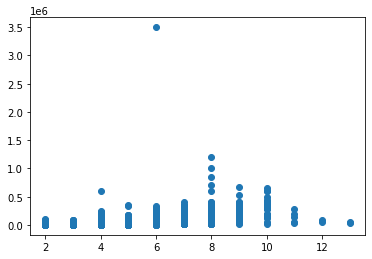

In [14]:
x = df['BHK'] + df['Bathroom']
y = df['Rent']

plt.scatter(x, y)
plt.show()

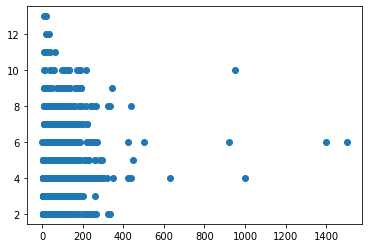

In [27]:
x = df['Rent'] / df['Size']
y = df['BHK'] + df['Bathroom']

plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

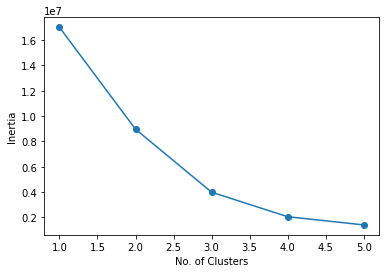

In [28]:
data = list(zip(x, y))

inertia = []
for i in range (1, 6):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker = 'o')
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


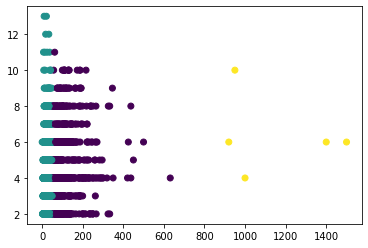

In [30]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c = labels)
plt.show()